In [1]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Работа с пропусками</b></h3>

<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><a href="#1"><li>Первичный анализ данных.</li></a><a href="#2"><li>Обработка нулевых значений.</li></a><a href="#3"><li>Практика.</li></a>
    <ul><a href="#4"><li>Первичный анализ.</li></a><a href="#5"><li>Удаление бесполезных признаков.</li></a><a href="#6"><li>Обработка пропущенных значений.</li></a></ul>    
</ul></font></p>

<h2>Первичный анализ данных</h2>
<p id="1">Важнейшим этапом предобработки данных является работа с нулевыми значениями/пропусками, помимо работы с переменными, выбросами и шумом. Все это может существенно улучшить качество модели. При знакомстве с новыми данными практически всегда стоит делать первичный (визуальный) анализ данных.</p>
<p><b>EDA</b> (англ. exploratory data analysis) - это критически важный процесс первоначального исследования данных с помощью  сводной статистики и визуализации с 4 основными целями:<ul><li>Выявить паттерны/закономерности</li><li>Заметить анамолии/шум</li><li>Сформировать гипотезы</li><li>Проверить первичные предположения</li></ul></p>

<p>Пример визуального анализа зависимостей данных о всеми известных ирисах Фишера:</p>
<p style="align: center;"><img align=center src="https://1.bp.blogspot.com/-_Zx9PRNDIu4/Xf_nkZozcLI/AAAAAAAAE3g/rOpxUSzOn-kxNNli8iSOXIJsStFTuJ3egCLcBGAsYHQ/s1600/3D_scatterplot_iris.png"  width=800></p><br>
<div class="alert alert-info"><p><i>Что нас прежде всего интересует при первичном анализе данных?</i>
<ol><li>Как собирались данные?</li><li>Сколько имеется переменных и что они  описывают?</li><li>Что обозначает каждая переменная, какие единицы измерения и как она собирается?</li><li>Есть ли пропущенные значения (NaN'ы, Not Available), и почему они возникли?</li><li>Есть ли выбросы в распределениях?</li><li>Присутствуют ли некие корреляции между переменными?</li></ol></div></p>

<h2>Обработка нулевых значений</h2>
<p id="2">В данном уроке пойдет речь о работе с пропущенными значениями в данных, он будет носить сугубо практический характер. Сразу оговоримся, чего <b>не стоит делать</b>, если Вы видите те или иные пропуски или нулевые значения, там где они быть не должны:
<ul><li>Удалять столбец (признак) содержащий такое значение (значительная потеря информации).</li><li>Удалять строки более безопасно, но только в том случае, если данных достаточно много. Иначе - потеря информации.</li></ul>
<p>Что обычно <b>нужно делать</b> с пропущенными значениями?</p>
<ul><li>Заменять на среднее значение, медиану, моду</li><li>Indicator Method - замена пропущенных значений нулями и создание новой переменной индикатора (где она принимает значение 1 при наличие пропуска и 0 в остальных случаях).</li><li>Повторить результат последнего наблюдения (среднее между соседними).</li><li>Восстановление пропусков на основе моделей.</li></ul>
<p style="align: center;">Здесь Вы можете видеть все использующиеся подходы к работе с пропусками/нулевыми значениями:<img align=center src="https://miro.medium.com/max/2400/1*_RA3mCS30Pr0vUxbp25Yxw.png"  width=800></p>

<h2>Практика</h2>
<p id="3">И перейдем сразу к практике. Будем заниматься анализом датасетом стоимости квартир, вносить те или иные изменения и смотреть как это будет влиять на "предсказательную" силу модели.</p>

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<h3>Первичный анализ</h3>
<p id="4">Имеем 11330 объектов и 18 признаков. Для начала посмотрим какие признаки у нас есть. Это "адресс", "кол-во ванных комнат","кол-во спален", "влощадь в кв. фут", "последняя цена продажи", и т.д.</p>


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/flaymax/tmp/master/final_data.csv', delimiter=';')
print(data.shape)
data.head(3)

(11330, 18)


,Unnamed: 0,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0


Будем использовать линейную регрессию для тестирования качества данных. Сразу напишем функцию получения скор (параметр от 0 до 1, который показывает насколько точна наша модель по отношению к таргетной переменной), для удобства.

In [4]:
def get_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)  
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

Для поиска выбросов будем использовать boxplot, для выявления корреляций между переменными - pairplot.

In [5]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
        plt.show()
    pass  

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass    

Т.к. нам предстоит работать с пропусками, то для их заполнения будем использовать стандартные способы и напишем специальную функцию для этого.
- заполнение значением
- max
- min
- mode
- median
- mean
- метод индикатора
- линейная регрессия

In [6]:
def get_value(X, column, mode='mean', value=0, columns_for_reg=None): 
    if mode == 'value':
        X.loc[X[X[column].isna()].index ,column] = value # заполнение значением
    elif mode == 'max':
        X.loc[X[X[column].isna()].index ,column] = X[column].max() # заполнение max
    elif mode == 'min':
        X.loc[X[X[column].isna()].index ,column] = X[column].min()  # заполнение min
    elif mode == 'median':
        X.loc[X[X[column].isna()].index ,column] = X[column].median()    # заполнение медианой
    elif mode == 'mode':
        X.loc[X[X[column].isna()].index, column] = X[column].mode()[0]   # заполнение модой
    elif mode == 'indicator': # метод индикатора (принимает значение 1 при наличие пропуска и 0 в остальных случаях)
        X['ind_'+str(column)] = 0
        X.loc[X[X[column].isna()].index, 'ind_'+str(column)] = 1
        X.loc[X[X[column].isna()].index, column] = 0     
    elif mode == 'linreg':   # линейная регрессия
        if columns_for_reg is None:
            cols = list(X.select_dtypes([np.number]).columns) 
            cols.remove(column)
        else:
            cols = columns_for_reg
        X_tmp = X.dropna()  
        m = LinearRegression().fit(X_tmp[cols], X_tmp[column])
        X.loc[X[X[column].isna()].index, column] = m.predict(X[X[column].isna()][cols])
    else:
        X.loc[X[X[column].isna()].index, column] = X[column].mean()  # по умолчанию среднее значение
    return X.head(3)

Первое, что можно сделать при встрече с новыми данными это запустить функцию .info(), которая соберет информацию о датасете (названия признаков, тип данных, кол-во ненулевых значений).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   z_address      11330 non-null  object 
 3   bathrooms      11330 non-null  float64
 4   bedrooms       11330 non-null  float64
 5   finishedsqft   11211 non-null  float64
 6   lastsolddate   11330 non-null  object 
 7   lastsoldprice  11330 non-null  float64
 8   latitude       11315 non-null  float64
 9   longitude      11315 non-null  float64
 10  neighborhood   11330 non-null  object 
 11  totalrooms     11281 non-null  float64
 12  usecode        11290 non-null  object 
 13  yearbuilt      11330 non-null  float64
 14  zestimate      11330 non-null  float64
 15  zindexvalue    11330 non-null  object 
 16  zipcode        11330 non-null  float64
 17  zpid           11330 non-null  float64
dtypes: flo

Также можно вызвать функцию .describe(), которая подсчитает статистики по всем количественными переменным (кол-во, среднее, дисперсию, квартили и т.д.)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11330.0,9.171729e+03,4.921941e+03,2.000000e+00,5.039750e+03,9.198500e+03,1.337475e+04,1.763200e+04
bathrooms,11330.0,1.980229e+00,1.047358e+00,5.000000e-01,1.000000e+00,2.000000e+00,2.000000e+00,1.400000e+01
bedrooms,11330.0,2.614475e+00,1.299457e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
finishedsqft,11211.0,1.586081e+03,9.228158e+02,1.000000e+00,1.019000e+03,1.362000e+03,1.878000e+03,2.727500e+04
lastsoldprice,11330.0,1.263928e+06,1.042079e+06,5.350000e+02,7.292500e+05,9.900000e+05,1.450000e+06,2.388900e+07
latitude,11315.0,3.775971e+01,2.558255e-02,3.770817e+01,3.773928e+01,3.776051e+01,3.778139e+01,3.780608e+01
longitude,11315.0,-1.224365e+02,3.074240e-02,-1.225107e+02,-1.224551e+02,-1.224325e+02,-1.224134e+02,-1.223812e+02
totalrooms,11281.0,6.113997e+00,1.215120e+01,1.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.264000e+03
yearbuilt,11330.0,1.948498e+03,3.791120e+01,1.860000e+03,1.916000e+03,1.940000e+03,1.986000e+03,2.016000e+03
zestimate,11330.0,1.565695e+06,1.229417e+06,4.323850e+05,9.052375e+05,1.230758e+06,1.731170e+06,1.553325e+07


Отсюда уже сразу можно увидеть выбросы. Например, видим, что имеется квартира с 1264 комнатами, квартира площадью 1 кв.фут, квартира стоимостью 535$ и т.д.

<h3>Удаление бесполезных признаков</h3>
<p id="5">Рассмотрим на первый взгляд непонятный признак 'Unnamed: 0'. Проверим предположении, что это какой-то технический номер, который остался после формирования датасета, и на стоимость квартир влиять не будет.</p>

In [9]:
data['Unnamed: 0'].value_counts(dropna=False)

16384    1
17117    1
10944    1
8897     1
15042    1
        ..
9518     1
11567    1
5424     1
13620    1
2047     1
Name: Unnamed: 0, Length: 11330, dtype: int64

Видим, что зависимость линейная и эта колонка не представляет интереса. Ее можно удалить.

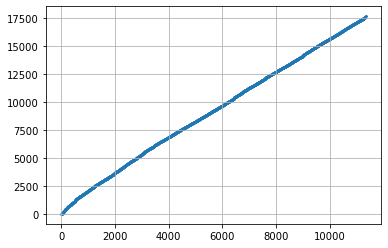

In [10]:
plt.scatter(data.index, data['Unnamed: 0'], s=1)
plt.grid()

In [11]:
data.drop(columns=['Unnamed: 0'], inplace=True)

Также можно выбросить колонки 'zindexvalue', 'zpid' т.к. это артефакты, которые остались после оценки zestimate, которые никак не влияют на оценку стоимости квартиры.

In [12]:
data.drop(columns=['zindexvalue','zpid'], inplace=True)

Итого имеем 15 признаков (используем .columns). И теперь можно заняться пропущенными значениями и дальнейшим анализом.

In [13]:
data.columns

Index(['address', 'z_address', 'bathrooms', 'bedrooms', 'finishedsqft',
       'lastsolddate', 'lastsoldprice', 'latitude', 'longitude',
       'neighborhood', 'totalrooms', 'usecode', 'yearbuilt', 'zestimate',
       'zipcode'],
      dtype='object')

<h3>Обработка пропущенных значений</h3>
<p id="6">Для начала посмотрим какое значение выдаст наша функция get_score без всяческой обработки, на сырых данных. Будем считать этот результат базовым.</p>

In [14]:
cols = ['bathrooms', 'bedrooms', 'finishedsqft', 
        'lastsoldprice', 'latitude', 'longitude', 'totalrooms', 'yearbuilt']
target = ['zestimate']
get_score(data.dropna()[cols], data.dropna()[target])

0.82752496134552

Сначала посмотрим выбросы, а после этого будем заполнять пропущенные значения. Возьмем признак площади квартиры. Построим боксплот и посмотрим распределение.

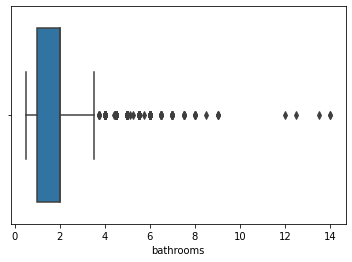

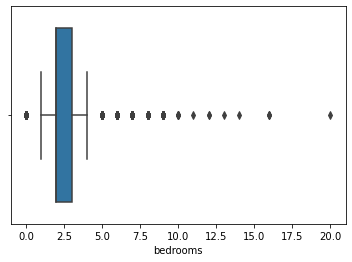

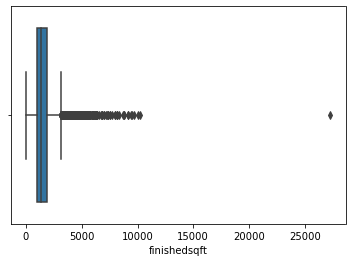

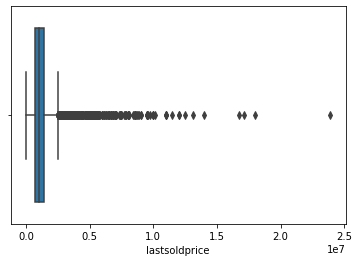

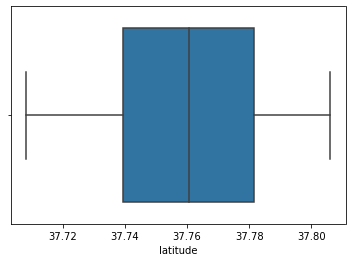

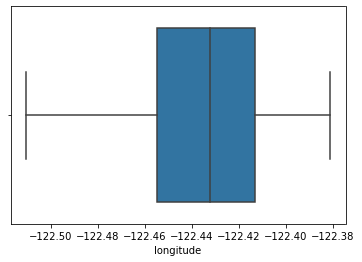

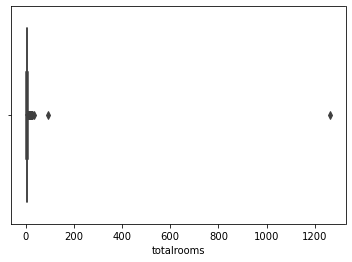

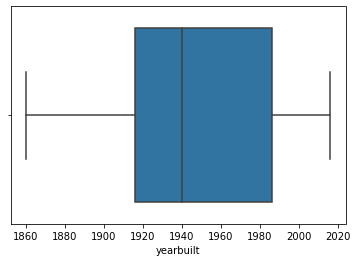

In [15]:
get_boxplot(data, columns = cols) #['finishedsqft'])

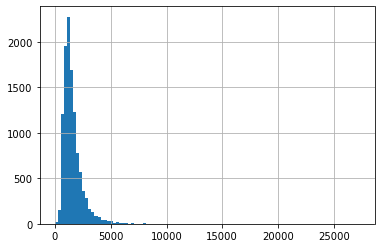

In [16]:
data['finishedsqft'].hist(bins=100)
plt.show()

Видим явный выброс на боксплоте. Это явная ошибка при заполнении данных. Если посмотреть на этот объект подробнее, то можно увидеть, что на 6 комнат приходится 27275 кв. фут.

In [17]:
data[data['finishedsqft'] > 15000]

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zipcode
4997,Address: 1645 Pacific Avenue,1645 Pacific Ave,2.0,2.0,27275.0,03/31/2015,600000.0,37.794658,-122.422325,Nob Hill,6.0,Condominium,1906.0,6754185.0,94109.0


Удаляем выброс и заполняем нулевые значения методом линейной регрессии.

In [18]:
data = data[(data['finishedsqft'] < 15000) | (data['finishedsqft'].isna())]
get_value(data, 'finishedsqft', mode='linreg', columns_for_reg=['bathrooms', 'bedrooms', 'lastsoldprice', 'latitude', 'longitude', 'yearbuilt'])

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zipcode
0,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,94103.0
1,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,94107.0
2,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,94107.0


Посмотрим на широтy и долготу. Видим, что во всех выбросах широты и долготы, пропущены сразу оба значения. Нет объектов, где пропущено что-то одно (берем индексы NaN'ов из широты, делаем из них множество и вычетаем множество индексов NaN'ов долготы, получаем пустое множество).

In [19]:
set(data[data['latitude'].isna()].index) - set(data[data['longitude'].isna()].index)

set()

Посмотрим есть ли у этих квартир пересечения по адресу с другими. Видим пересечение только у 3 объектов. Их можно заполнить скопировав широту и долготу.

In [20]:
set_address_for_lat_long = set(data[data['latitude'].isna()]['z_address']) & set(data[~data['latitude'].isna()]['z_address'])
set_address_for_lat_long

{'1015 Ashbury St APT 2', '1566 27th Ave', '5853 Mission St APT 4'}

In [30]:
#мой код - работает
for item in set_address_for_lat_long:
    cur_item = data[data['z_address'] == item]
    lat = cur_item[~cur_item['latitude'].isna()]['latitude'].iloc[0]
    long = cur_item[~cur_item['longitude'].isna()]['longitude'].iloc[0]
    data.loc[(data['z_address'] == item), 'latitude'] = lat
    data.loc[(data['z_address'] == item), 'longitude'] = long

In [31]:
""" исходный код - не работает

for i, el in data[data['latitude'].isna()].iterrows():
    cur_el = data[data['z_address'] == el['z_address']]
    
    print(cur_el)
    
    if cur_el.shape[0] > 1:
        data.loc[i, 'latitude'] = cur_el.iloc[1]['latitude']
        data.loc[i, 'longitude'] = cur_el.iloc[1]['longitude']
        print(i, '---', data.loc[i, 'latitude'])
        print(i, '---', data.loc[i, 'latitude'])
        print('------------------------------------')
        
"""

" исходный код - не работает\n\nfor i, el in data[data['latitude'].isna()].iterrows():\n    cur_el = data[data['z_address'] == el['z_address']]\n    \n    print(cur_el)\n    \n    if cur_el.shape[0] > 1:\n        data.loc[i, 'latitude'] = cur_el.iloc[1]['latitude']\n        data.loc[i, 'longitude'] = cur_el.iloc[1]['longitude']\n        print(i, '---', data.loc[i, 'latitude'])\n        print(i, '---', data.loc[i, 'latitude'])\n        print('------------------------------------')\n        \n"

Для других объектов заполним пропущенные значения медианой по принадлежности району. Для этого получим уникальные сочетания почтовых индексов и районов, и выведем для этих сочетаний медианные значения широты и долготы.

In [32]:
data.groupby(['zipcode', 'neighborhood']).agg({'latitude':'median', 'longitude':'median'}).reset_index()

,zipcode,neighborhood,latitude,longitude
0,94102.0,Downtown,37.786190,-122.407630
1,94102.0,Hayes Valley,37.772243,-122.426551
2,94102.0,Van Ness - Civic Center,37.781386,-122.421406
3,94103.0,Mission,37.766736,-122.421846
4,94103.0,South of Market,37.775993,-122.411809
...,...,...,...,...
124,94134.0,Excelsior,37.728280,-122.423571
125,94134.0,Little Hollywood,37.712230,-122.398930
126,94134.0,Portola,37.726208,-122.411113
127,94134.0,Visitacion Valley,37.714392,-122.405860


In [33]:
data_long_lat = data.groupby(['zipcode', 'neighborhood']).agg({'latitude':'median', 'longitude':'median'}).reset_index()
for i, el in data[data['latitude'].isna()].iterrows():
    data.loc[i, 'latitude'] = data_long_lat[(data_long_lat['zipcode'] == el['zipcode']) & (data_long_lat['neighborhood'] == el['neighborhood'])]['latitude'].values[0]
    data.loc[i, 'longitude'] = data_long_lat[(data_long_lat['zipcode'] == el['zipcode']) & (data_long_lat['neighborhood'] == el['neighborhood'])]['longitude'].values[0]

Видим, что широту и долготу заполнили. Посмотрим на промежуточный скор.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11329 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11329 non-null  object 
 1   z_address      11329 non-null  object 
 2   bathrooms      11329 non-null  float64
 3   bedrooms       11329 non-null  float64
 4   finishedsqft   11329 non-null  float64
 5   lastsolddate   11329 non-null  object 
 6   lastsoldprice  11329 non-null  float64
 7   latitude       11329 non-null  float64
 8   longitude      11329 non-null  float64
 9   neighborhood   11329 non-null  object 
 10  totalrooms     11280 non-null  float64
 11  usecode        11289 non-null  object 
 12  yearbuilt      11329 non-null  float64
 13  zestimate      11329 non-null  float64
 14  zipcode        11329 non-null  float64
dtypes: float64(10), object(5)
memory usage: 1.6+ MB


В результате этих манипуляций подняли скор на 2%.

In [35]:
cols = ['bathrooms', 'bedrooms', 'finishedsqft', 
        'lastsoldprice', 'latitude', 'longitude', 'totalrooms', 'yearbuilt']
target = ['zestimate']
get_score(data.dropna()[cols], data.dropna()[target])

0.8406653997827988

Теперь посмотрим признак "totalrooms". Для начала надо убрать выбросы. Строим для этого боксплот.

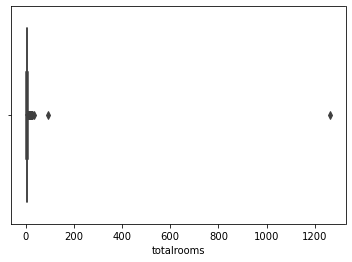

In [36]:
get_boxplot(data, ['totalrooms'])

Видим 2 явных выброса. Имеется объект с 94 комнатами на 805 кв. футов и 1264 комнатами на 1264 кв. фута. Удаляем их, скорее всего это ошибка ручного ввода.

In [37]:
data[data['totalrooms'] > 75]

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zipcode
8300,Address: 5264 3rd Street #304,5264 3rd St APT 304,2.0,2.0,805.0,07/18/2013,325000.0,37.729825,-122.392825,Bayview,94.0,Condominium,1993.0,502285.0,94124.0
8967,Address: 2829 California Street #3C,2829 California St APT 3C,2.0,2.0,1264.0,03/14/2013,1375000.0,37.787654,-122.440902,Lower Pacific Heights,1264.0,Condominium,2012.0,1591608.0,94115.0


In [38]:
data = data[(data['totalrooms'] < 75) | (data['totalrooms'].isna()) ]

Теперь заполним пропущенные значения с помощью метода линейной регрессии.

In [39]:
get_value(data, 'totalrooms', mode='linreg', columns_for_reg=['bathrooms', 'bedrooms', 'lastsoldprice', 'latitude', 'longitude', 'yearbuilt', 'finishedsqft'])

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zipcode
0,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,94103.0
1,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,94107.0
2,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,94107.0


Осталось заполнить usecode. Имеем 40 пропусков.

In [44]:
data['usecode'].value_counts(dropna=False)

SingleFamily        5785
Condominium         4779
MultiFamily2To4      484
Duplex               146
Townhouse             66
NaN                   40
Miscellaneous         17
Cooperative            3
Apartment              3
MultiFamily5Plus       2
Mobile                 2
Name: usecode, dtype: int64

Разметим наши данные колонки 'usecode' с помощью LabelEncoder, а затем обучим логистическую регрессию на них и получим предсказанные значения.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [46]:
X_tmp=data.dropna()
X_tmp.head(3)

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zipcode
0,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,94103.0
1,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,94107.0
2,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,94107.0


In [47]:
le = LabelEncoder()
X_tmp['tr'] = le.fit_transform(X_tmp['usecode'])
X_tmp['tr']

0        1
1        1
2        1
3        8
4        8
        ..
11325    8
11326    6
11327    8
11328    8
11329    8
Name: tr, Length: 11287, dtype: int64

Обучаем логистическую регрессию.

In [48]:
logreg = LogisticRegression()
cols = ['bathrooms', 'bedrooms', 'finishedsqft', 
        'lastsoldprice', 'latitude', 'longitude', 'totalrooms', 'yearbuilt']
logreg.fit(X_tmp[cols], X_tmp['tr'])

LogisticRegression()

Делаем обратное преобразование LabelEncoder и получаем предсказанные данные.

In [52]:
le.inverse_transform(logreg.predict(data[data['usecode'].isna()][cols]))

array(['SingleFamily', 'SingleFamily', 'Condominium', 'Condominium',
       'Condominium', 'SingleFamily', 'SingleFamily', 'Condominium',
       'SingleFamily', 'SingleFamily', 'SingleFamily', 'SingleFamily',
       'SingleFamily', 'Condominium', 'Condominium', 'Condominium',
       'SingleFamily', 'SingleFamily', 'SingleFamily', 'SingleFamily',
       'SingleFamily', 'Condominium', 'SingleFamily', 'SingleFamily',
       'Condominium', 'SingleFamily', 'SingleFamily', 'SingleFamily',
       'Condominium', 'Condominium', 'SingleFamily', 'SingleFamily',
       'Condominium', 'Condominium', 'Condominium', 'Condominium',
       'SingleFamily', 'SingleFamily', 'SingleFamily', 'SingleFamily'],
      dtype=object)

Заполняем ими пропуски.

In [53]:
data.loc[data[data['usecode'].isna()].index, 'usecode'] = le.inverse_transform(logreg.predict(data[data['usecode'].isna()][cols]))

В итоге, все пропуски во всех признаках заполнены, задача выполнена.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11327 entries, 0 to 11329
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11327 non-null  object 
 1   z_address      11327 non-null  object 
 2   bathrooms      11327 non-null  float64
 3   bedrooms       11327 non-null  float64
 4   finishedsqft   11327 non-null  float64
 5   lastsolddate   11327 non-null  object 
 6   lastsoldprice  11327 non-null  float64
 7   latitude       11327 non-null  float64
 8   longitude      11327 non-null  float64
 9   neighborhood   11327 non-null  object 
 10  totalrooms     11327 non-null  float64
 11  usecode        11327 non-null  object 
 12  yearbuilt      11327 non-null  float64
 13  zestimate      11327 non-null  float64
 14  zipcode        11327 non-null  float64
dtypes: float64(10), object(5)
memory usage: 1.6+ MB


Видим, что итоговый результат улучшился на 3%.

In [55]:
cols = ['bathrooms', 'bedrooms', 'finishedsqft', 
        'lastsoldprice', 'latitude', 'longitude', 'totalrooms', 'yearbuilt']
target = ['zestimate']
get_score(data.dropna()[cols], data.dropna()[target])

0.8522566971460339

<h2>Summary</h2>
<ol><li>Первичный <b>визуальный анализ</b> данных очень <b>важен</b> для выявления <b>выбросов/шума</b>, корреляций между признаками, что может значительно <b>ухудшить</b> эффективность модели.</li><li><b>Не стоит</b> сразу <b>удалять</b> столбец или строку, если в ней п<b>ропущенное значение</b>, это может повлечь потерю информации. В зависимости от ситуации, пропуск можно <b>заменить</b> медианой, средним, модой или индикатором.</li></ol>

<h3>Вопросы для самопроверки</h3>
<p><ol><li>Какие методы замены пропусков вы знаете? Для чего нужно это делать?</li><li>Что стоит делать при первичном анализе данных? На что смотреть?</li></ol></p>

<h1>Спасибо за внимание!</h1>